# Distribuzione file del Dataset in seguito alle fasi di Preprocessing

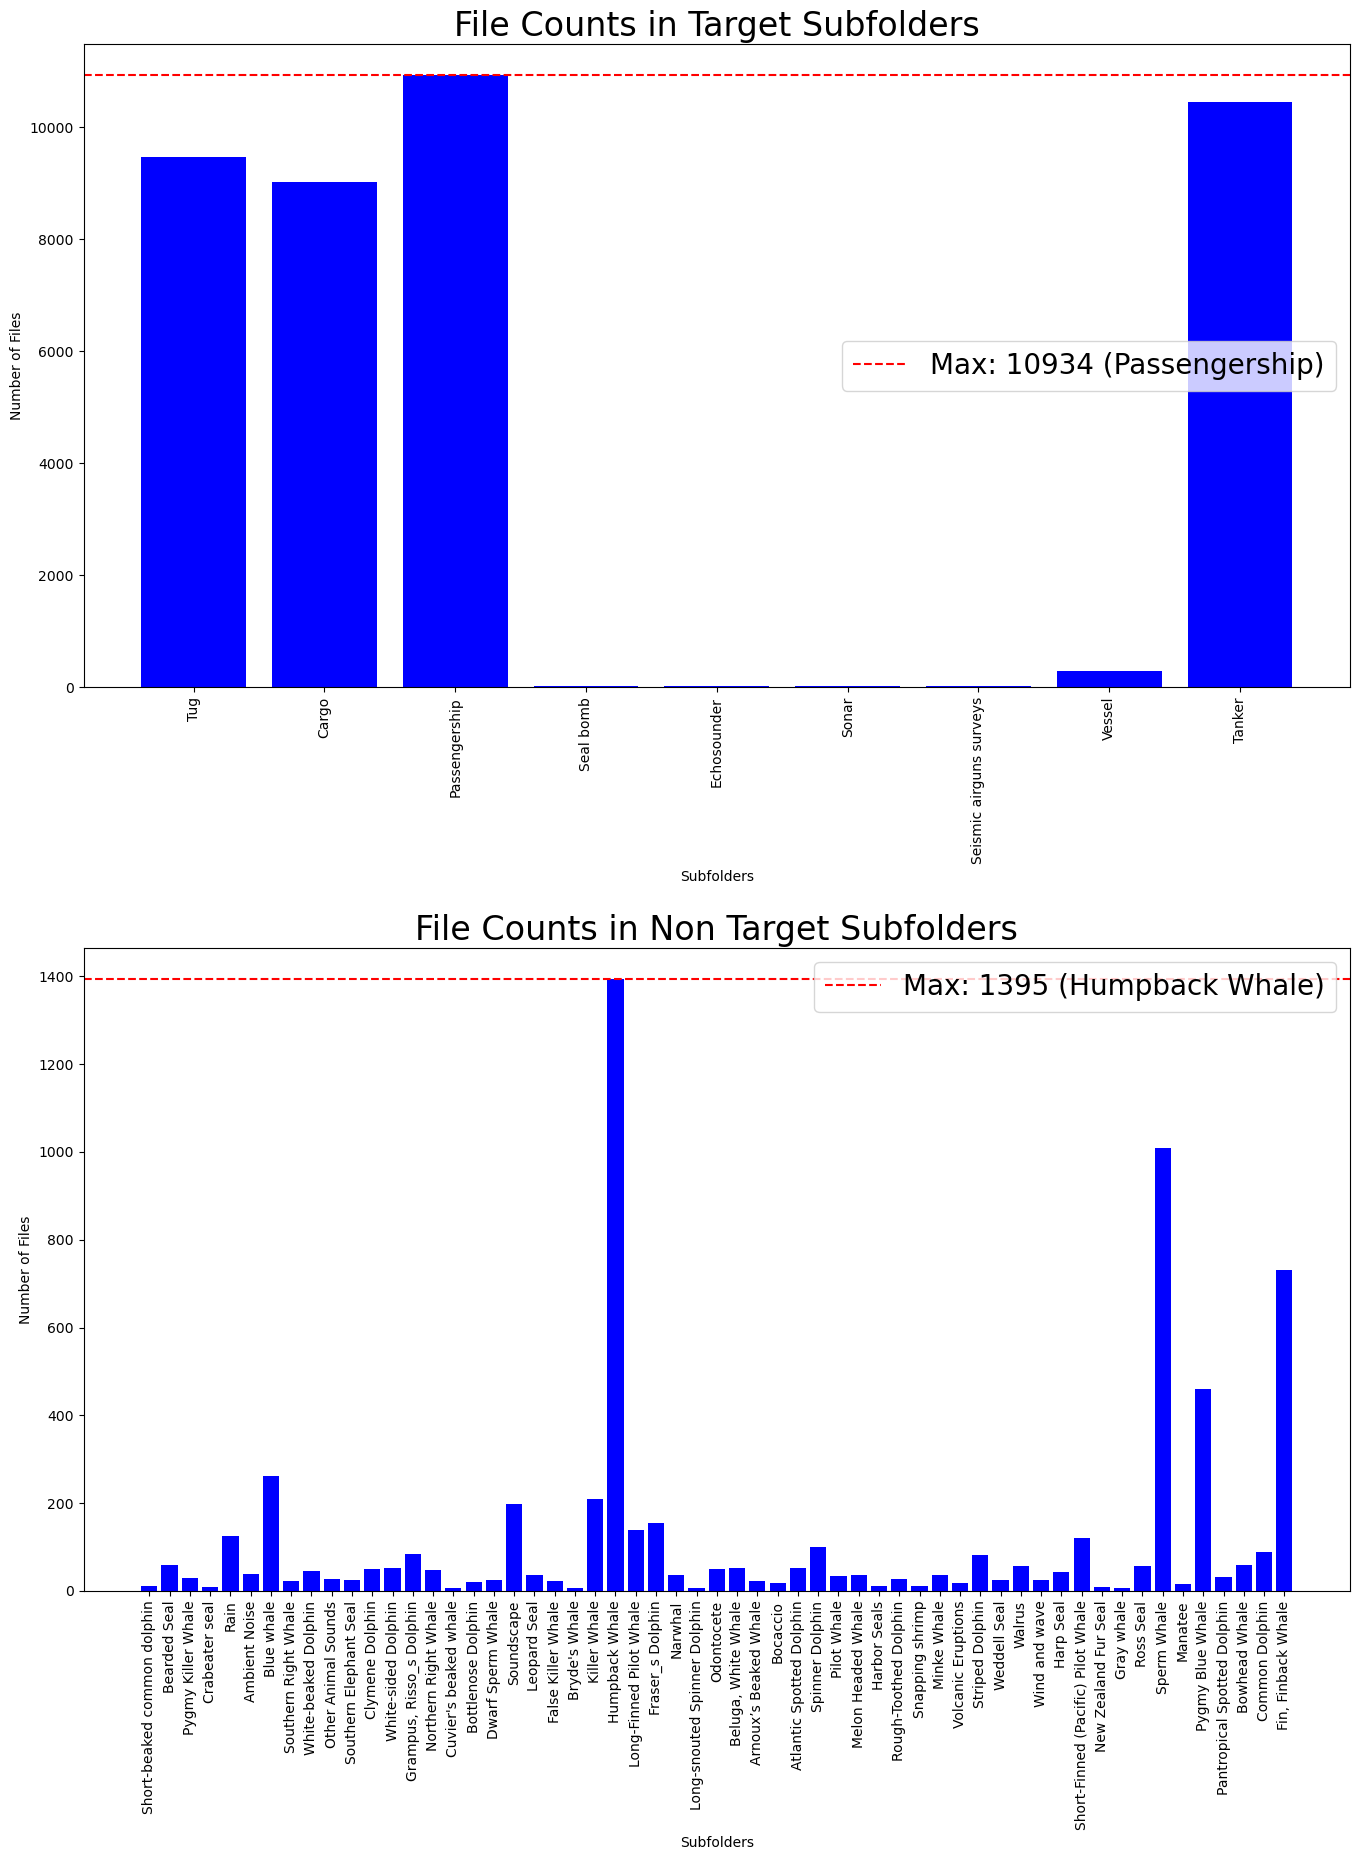

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt

# Function to count files in each subfolder
def count_files_in_subfolders(parent_folder):
    subfolder_counts = {}
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = sum([len(files) for r, d, files in os.walk(subfolder_path)])
            subfolder_counts[subfolder] = file_count
    return subfolder_counts

# Paths to the Target and non-target directories
target_path = 'Modello/Allenamento/Target'
non_target_path = 'Modello/Allenamento/Non-target'

# Get file counts
target_counts = count_files_in_subfolders(target_path)
non_target_counts = count_files_in_subfolders(non_target_path)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(14, 19))
plt.rcParams.update({'font.size': 20})

# Plot for Target
max_target_value = max(target_counts.values())
max_target_key = max(target_counts, key=target_counts.get)
axes[0].bar(target_counts.keys(), target_counts.values(), color='blue')  # Specifica il colore blu
axes[0].set_title('File Counts in Target Subfolders')
axes[0].set_xlabel('Subfolders')
axes[0].set_ylabel('Number of Files')
axes[0].tick_params(axis='x', rotation=90)  # Ruota le etichette di 90 gradi
axes[0].axhline(y=max_target_value, color='r', linestyle='--', label=f'Max: {max_target_value} ({max_target_key})')
axes[0].legend()

# Plot for Non Target
max_non_target_value = max(non_target_counts.values())
max_non_target_key = max(non_target_counts, key=non_target_counts.get)
axes[1].bar(non_target_counts.keys(), non_target_counts.values(), color='blue')  # Specifica il colore blu
axes[1].set_title('File Counts in Non Target Subfolders')
axes[1].set_xlabel('Subfolders')
axes[1].set_ylabel('Number of Files')
axes[1].tick_params(axis='x', rotation=90)  # Ruota le etichette di 90 gradi
axes[1].axhline(y=max_non_target_value, color='r', linestyle='--', label=f'Max: {max_non_target_value} ({max_non_target_key})')
axes[1].legend()

# Regola lo spazio tra i plot
plt.tight_layout()

# Mostra i plot
plt.show()


# Distribuzione dei file nelle classi minoritarie

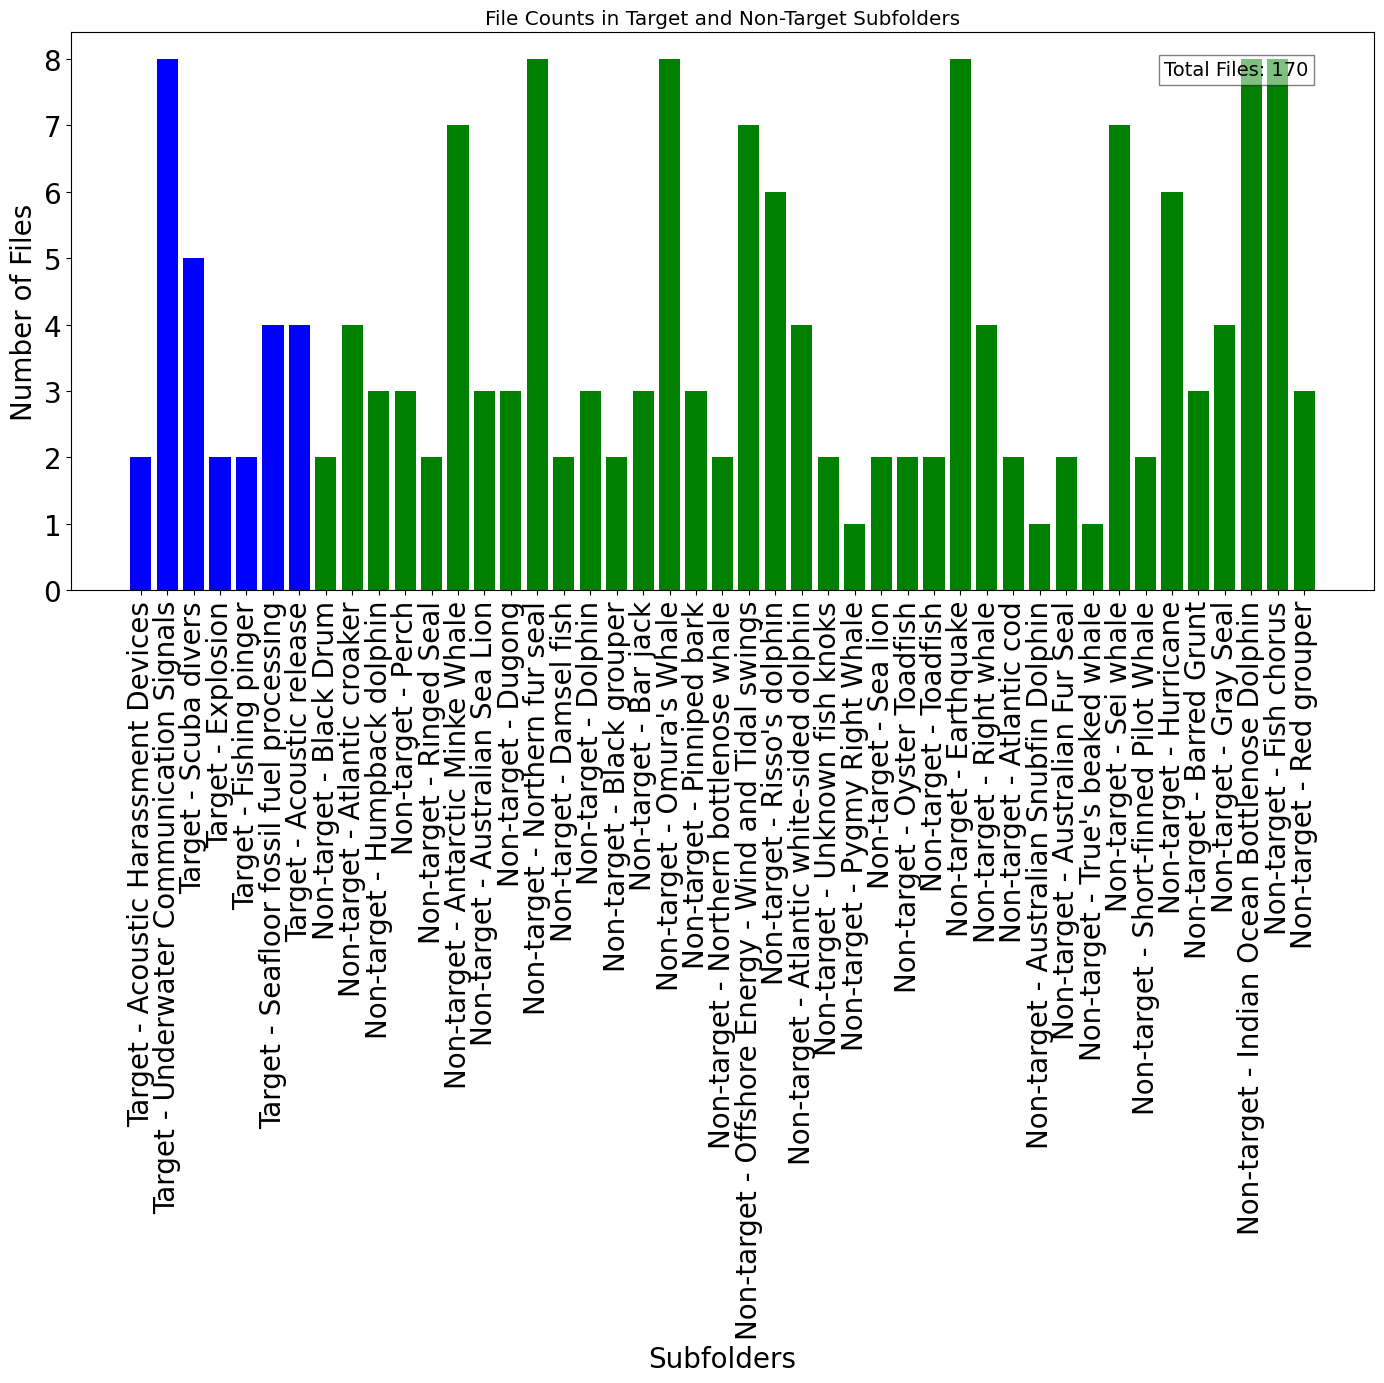

In [3]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt

# Function to count files in each subfolder
def count_files_in_subfolders(parent_folder):
    subfolder_counts = {}
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = sum([len(files) for r, d, files in os.walk(subfolder_path)])
            subfolder_counts[subfolder] = file_count
    return subfolder_counts

# Paths to the Target and non-target directories
target_path = 'Modello/Allenamento/Altro/Target'
non_target_path = 'Modello/Allenamento/Altro/Non-target'

# Get file counts
target_counts = count_files_in_subfolders(target_path)
non_target_counts = count_files_in_subfolders(non_target_path)

# Combine target and non-target counts
combined_counts = {**{f'Target - {k}': v for k, v in target_counts.items()},
                   **{f'Non-target - {k}': v for k, v in non_target_counts.items()}}

# Plotting
fig, ax = plt.subplots(figsize=(14, 14))
plt.rcParams.update({'font.size': 12})

# Plot combined data
colors = ['blue' if 'Target' in key else 'green' for key in combined_counts.keys()]
ax.bar(combined_counts.keys(), combined_counts.values(), color=colors)
ax.set_title('File Counts in Target and Non-Target Subfolders')
ax.set_xlabel('Subfolders')
ax.set_ylabel('Number of Files')
ax.tick_params(axis='x', rotation=90)  # Rotate x labels

# Calculate and annotate the total number of files
total_files = sum(combined_counts.values())
ax.text(0.95, 0.95, f'Total Files: {total_files}', transform=ax.transAxes,
        fontsize=14, verticalalignment='top', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
